### Why Natural Language Processing

Natural Language Processing allows analysis of review comments (textual data)  to gather feedback of current practices. We can use these feedbacks to suggest practices to  sellers to improve customer satisfaction.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplo
import time
import nltk
import re

### Data Cleaning

In [2]:
reviewData = pd.read_csv('./data/brazilian-ecommerce/olist_order_reviews_dataset.csv')
com_rate = pd.DataFrame(reviewData[['order_id', 'review_score', 'review_comment_message']]).dropna()
com_rate['polarity_score'] = np.nan
com_rate['review_translated_message']= np.nan
com_rate.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41753 entries, 3 to 99999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   order_id                   41753 non-null  object 
 1   review_score               41753 non-null  int64  
 2   review_comment_message     41753 non-null  object 
 3   polarity_score             0 non-null      float64
 4   review_translated_message  0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.9+ MB


### Score Distribution

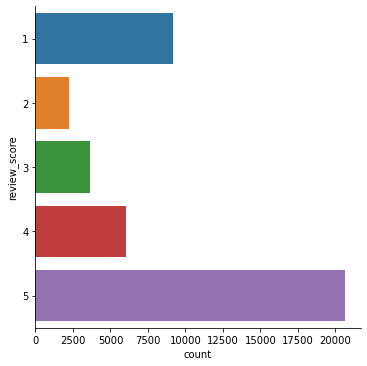

In [3]:
sb.catplot( y ='review_score', data = com_rate, kind = 'count')
plt.show()

Mostly those with extreme ratings (1 & 5) has commented. Since majority of scores are > 3, with score of 5 being most common, we can say that mostly users had good experience with Olist. However, we need to take note of what results in bad scores (<3) and encourage sellers to take corrective action while maintaining the actions that caused for positive comments.

### Word Processing

#### Process & Clean Text for Consistency
- Remove non-letters (such as punctuations and emoticons)
- Tokenize (extract words from the sentences)
- Convert to lower case  (for consistency)
- Remove Stopwords in Portuguese  (improve accuracy)


In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Kee
[nltk_data]     How\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kee
[nltk_data]     How\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
comments_processed = []

stopword_pt = set(stopwords.words('portuguese'))
#print(stopword_pt)

for review in com_rate['review_comment_message']:
    # remove non-letters such as emoticons
    no_non_letter = re.sub("[^a-zA-Z]", " ", review) 
    #extract words from the sentences #tokenise
    token = nltk.word_tokenize(no_non_letter)
    #convert to lower case
    token = [word.lower() for word in token]
    #remove stopwords
    tokens_no_sw = [word for word in token if not word in stopword_pt]
    #add to list
    comments_processed.append(' '.join(tokens_no_sw))


comments_processed

['recebi bem antes prazo estipulado',
 'parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa',
 'aparelho eficiente site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega antes prazo',
 'gostaria saber sempre recebi compra agora decpcionou',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilmente entrega efetuada antes prazo dado produto j come ser usado at presente problemas',
 'rel gio bonito barato',
 'n gostei comprei gato lebre',
 'sempre compro internet entrega ocorre antes prazo combinado acredito ser prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto',
 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completamente apaixonada loja super respons vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedo

#### Extract Bigram

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
co_bi = CountVectorizer(ngram_range = (2,2))
counts = co_bi.fit_transform (comments_processed)
bigram = pd.DataFrame(counts.sum(axis=0),columns=co_bi.get_feature_names()).T.sort_values(0,ascending=False)
bigram = bigram.reset_index().rename(columns = {'index': 'bigram', 0:'frequency'})

bigram

,bigram,frequency
0,antes prazo,4207
1,recebi produto,1942
2,produto chegou,1720
3,produto entregue,1616
4,chegou antes,1465
...,...,...
114381,espero resolver,1
114382,espero resolva,1
114383,espero resista,1
114384,espero repita,1


#### Keep Bigram with Frequency  >=50 

In [8]:
bigram_impt = pd.DataFrame(bigram.loc[bigram['frequency'] >= 50])
bigram_impt

,bigram,frequency
0,antes prazo,4207
1,recebi produto,1942
2,produto chegou,1720
3,produto entregue,1616
4,chegou antes,1465
...,...,...
375,prazo satisfeita,50
376,realizei compra,50
377,conforme esperado,50
378,hoje dia,50


### Data Visualisation using  `wordcloud`

Wordcloud enables visualisation of text with reference to its frequency. It highlights some of the important feedbacks from the customers to sellers


In [9]:
from wordcloud import WordCloud

### Data Visualisation of Portuguese Text

In [10]:
bigram_string=(" ").join(bigram_impt['bigram'].tolist())
bigram_string

'antes prazo recebi produto produto chegou produto entregue chegou antes dentro prazo bem antes parab ns entrega pida produto bom produto veio entregue antes prazo entrega bem embalado timo produto super recomendo chegou bem entrega antes tudo certo at agora tima qualidade rel gio ainda recebi boa qualidade entregue prazo prazo produto bom produto chegou prazo entrega super produto excelente nota fiscal produto qualidade gostei produto antes data prazo previsto antes previsto tudo ok entrega produto at momento entrega prazo condi es produto ainda perfeito estado super pida lojas lannister recomendo loja comprei produto produto entrega excelente produto prazo recomendo nao recebi data prevista recomendo todos produto tima prazo estipulado recebi apenas an ncio produto boa entregue dentro recebi antes produto bem pida produto produto timo comprei dois produto conforme tudo certinho produto correto excelente qualidade perfeitas condi recomendo produto at hoje chegou pido chegou dentro fiz

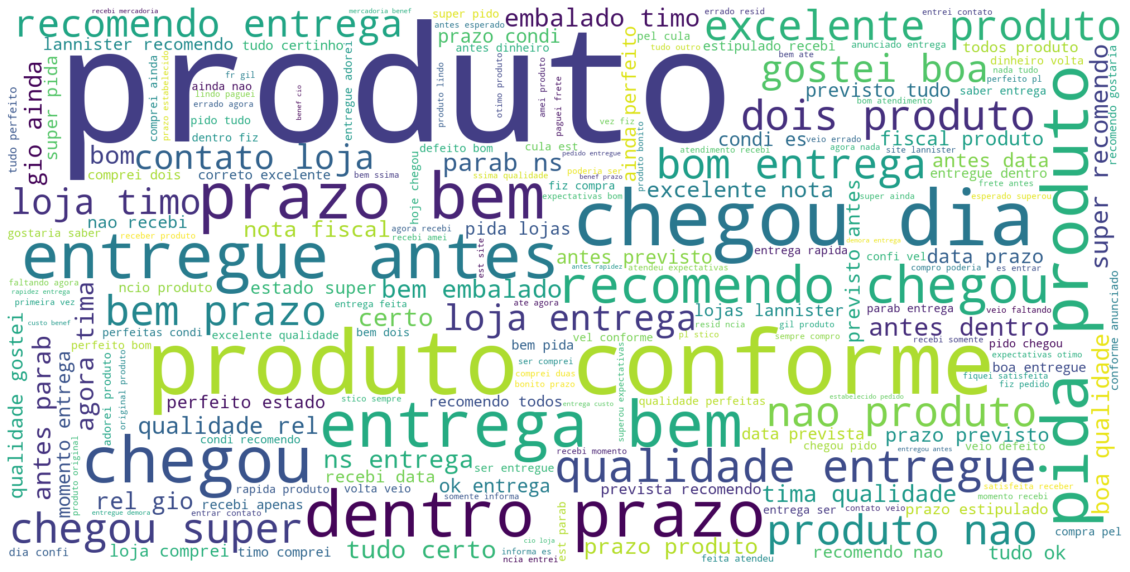

In [11]:
wordcloud = WordCloud(width=2000, height =1000,collocation_threshold = 2, 
                      background_color = 'white').generate(bigram_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### Translate by importing `google_trans_new`

In [12]:
from google_trans_new import google_translator
translator = google_translator()

#### Translate bigram

In [13]:
bigram_impt['translated_bigram'] = bigram_impt['bigram'].apply(translator.translate)
bigram_impt

,bigram,frequency,translated_bigram
0,antes prazo,4207,before term
1,recebi produto,1942,I received a product
2,produto chegou,1720,Product arrived
3,produto entregue,1616,product delivered
4,chegou antes,1465,arrived before
...,...,...,...
375,prazo satisfeita,50,term
376,realizei compra,50,I made a purchase
377,conforme esperado,50,as expected
378,hoje dia,50,today day


### Data Visualisation of English Text

In [14]:
bigram_string2 = (" ").join(bigram_impt['translated_bigram'].tolist())
bigram_string2

"before term  I received a product  Product arrived  product delivered  arrived before  within term  well before  parab ns  delivery ask for  good product  product came  delivered before  deadline delivery  well packed  Timo Product  super recommend  arrived well  Delivery before  all very well  at now  TIMA Quality  relia  I still received  good quality  deliver deadline  product  good product  has arrived deadline  super delivery  excellent product  Tax Note  product quality  I liked the product  before date  expected  predicted  everything is OK  Delivery Product  and Momento.  delivery time  Condi is  product  perfect state  Super Ask  Lannister Stores  Recommend Store  purchased product  product delivery  excellent product  Deadline recommend  not received  expected date  Recommend all  Tima product  stipulated  I just received  an ncio  good product  delivered in  I received before  product  Ask for product  Timo Product  I bought two  product according to  all right  correct pro

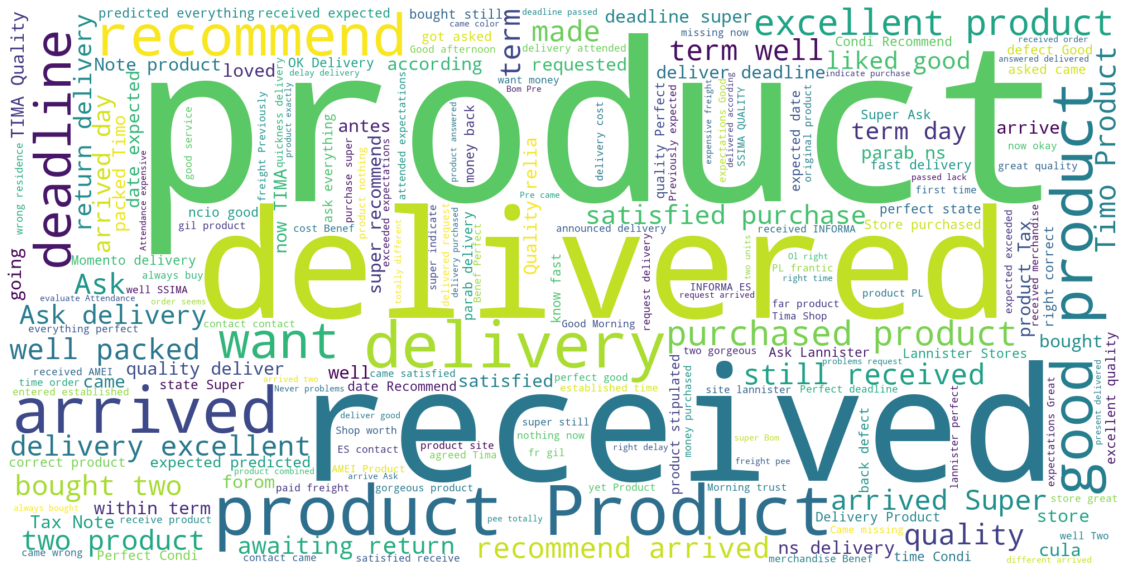

In [15]:
wordcloud2 = WordCloud(width=2000, height =1000,collocation_threshold = 2, 
                       background_color = 'white').generate(bigram_string2)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud2,interpolation="bilinear")
plt.axis('off')
plt.show()

### Sentiment Analysis

Sentiment Analysis enables us to separate comments by polarity. It allows differentiation of the good practices of the sellers that should be continued from bad practices that should be improved on.

Negative comments can be used to get pointers for improvement. Positive & neutral comments denote practices sellers should continue doing. This can also give a sense of what customers could expect from Olist. 

In [16]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
#sia.polarity_scores("amazing")

[nltk_data] Downloading package vader_lexicon to C:\Users\Kee
[nltk_data]     How\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
sia.polarity_scores("before term")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [18]:
polarity = []
for i in bigram_impt['translated_bigram']:
    polar = sia.polarity_scores(i).get('compound')
    polarity += [polar]
    

bigram_impt['polarity_score'] = np.array(polarity)
bigram_impt

,bigram,frequency,translated_bigram,polarity_score
0,antes prazo,4207,before term,0.0
1,recebi produto,1942,I received a product,0.0
2,produto chegou,1720,Product arrived,0.0
3,produto entregue,1616,product delivered,0.0
4,chegou antes,1465,arrived before,0.0
...,...,...,...,...
375,prazo satisfeita,50,term,0.0
376,realizei compra,50,I made a purchase,0.0
377,conforme esperado,50,as expected,0.0
378,hoje dia,50,today day,0.0


#### Negative comments

In [19]:
bigram_neg = pd.DataFrame(bigram_impt.loc[bigram_impt['polarity_score'] < 0])
bigram_neg

,bigram,frequency,translated_bigram,polarity_score
80,veio defeito,171,defect,-0.3400
115,veio faltando,131,Came missing,-0.2960
124,pl stico,127,PL frantic,-0.4404
140,produto errado,118,wrong product,-0.4767
151,veio errado,109,came wrong,-0.4767
186,atraso entrega,85,delay delivery,-0.3182
189,falta respeito,84,lack,-0.3182
262,baixa qualidade,66,low quality,-0.2732
279,resolver problema,62,resolve the problem,-0.0258
288,problema entrega,61,Problem Delivery,-0.4019


In [20]:
bigram_Sneg = (" ").join(bigram_neg['translated_bigram'].tolist())
bigram_Sneg

'defect  Came missing  PL frantic  wrong product  came wrong  delay delivery  lack  low quality  resolve the problem  Problem Delivery  horror  no problem  no answer  Nico problem  are missing '

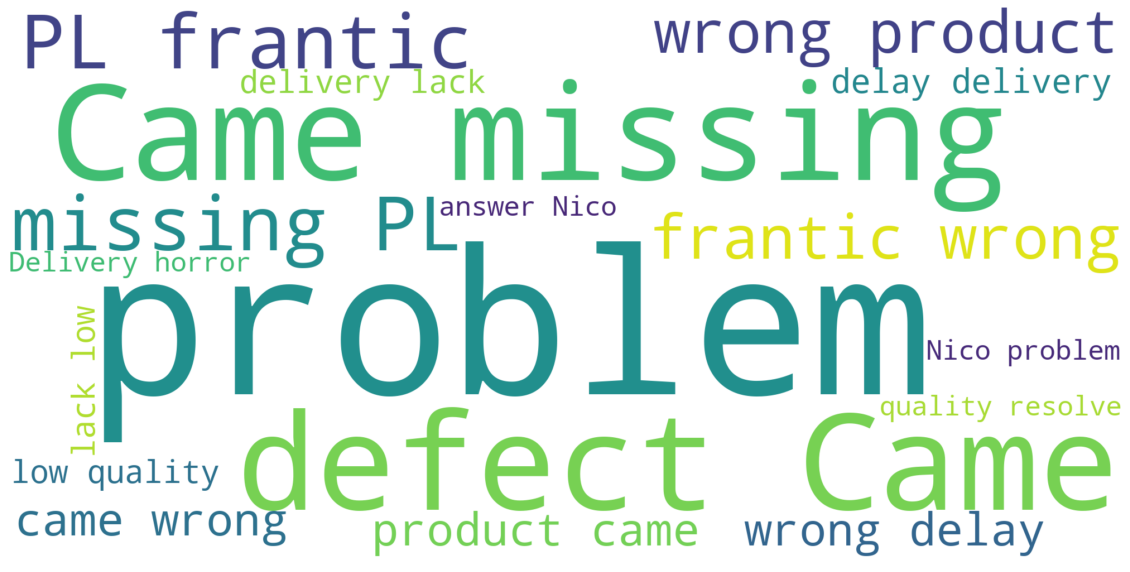

In [21]:
bigram_Sneg = (" ").join(bigram_neg['translated_bigram'].tolist())

wordcloud_neg = WordCloud(width=2000, height =1000,collocation_threshold = 2, 
                       background_color = 'white').generate(bigram_Sneg)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud_neg,interpolation="bilinear")
plt.axis('off')
plt.show()

#### Neutral Comments

In [22]:
bigram_neu = pd.DataFrame(bigram_impt.loc[bigram_impt['polarity_score'] == 0])
bigram_neu

,bigram,frequency,translated_bigram,polarity_score
0,antes prazo,4207,before term,0.0
1,recebi produto,1942,I received a product,0.0
2,produto chegou,1720,Product arrived,0.0
3,produto entregue,1616,product delivered,0.0
4,chegou antes,1465,arrived before,0.0
...,...,...,...,...
375,prazo satisfeita,50,term,0.0
376,realizei compra,50,I made a purchase,0.0
377,conforme esperado,50,as expected,0.0
378,hoje dia,50,today day,0.0


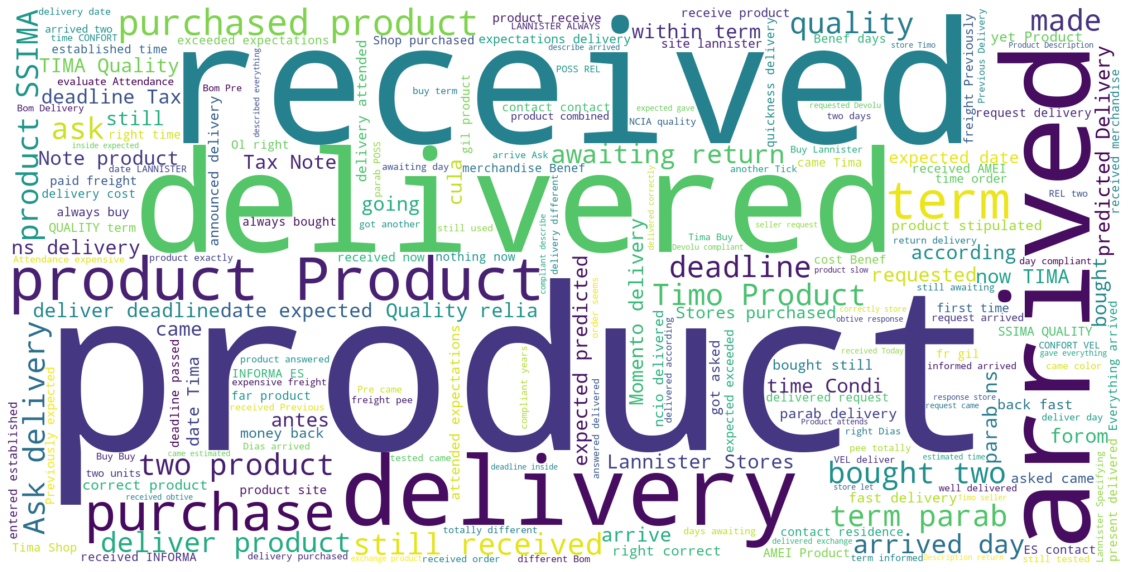

In [29]:
bigram_Sneu = (" ").join(bigram_neu['translated_bigram'].tolist())

wordcloud_neu = WordCloud(width=2000, height =1000,collocation_threshold = 2, 
                       background_color = 'white').generate(bigram_Sneu)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud_neu,interpolation="bilinear")
plt.axis('off')
plt.show()

#### Positive Comments

In [24]:
bigram_pos = pd.DataFrame(bigram_impt.loc[bigram_impt['polarity_score'] > 0])
bigram_pos

,bigram,frequency,translated_bigram,polarity_score
6,bem antes,973,well before,0.2732
9,produto bom,883,good product,0.4404
13,bem embalado,654,well packed,0.2732
15,super recomendo,608,super recommend,0.7506
16,chegou bem,551,arrived well,0.2732
...,...,...,...,...
348,bom gostei,52,"good, I liked",0.6908
349,boa compra,52,good bargain,0.5719
355,satisfeito compra,52,satisfied purchase,0.4215
366,produto super,51,super,0.5994


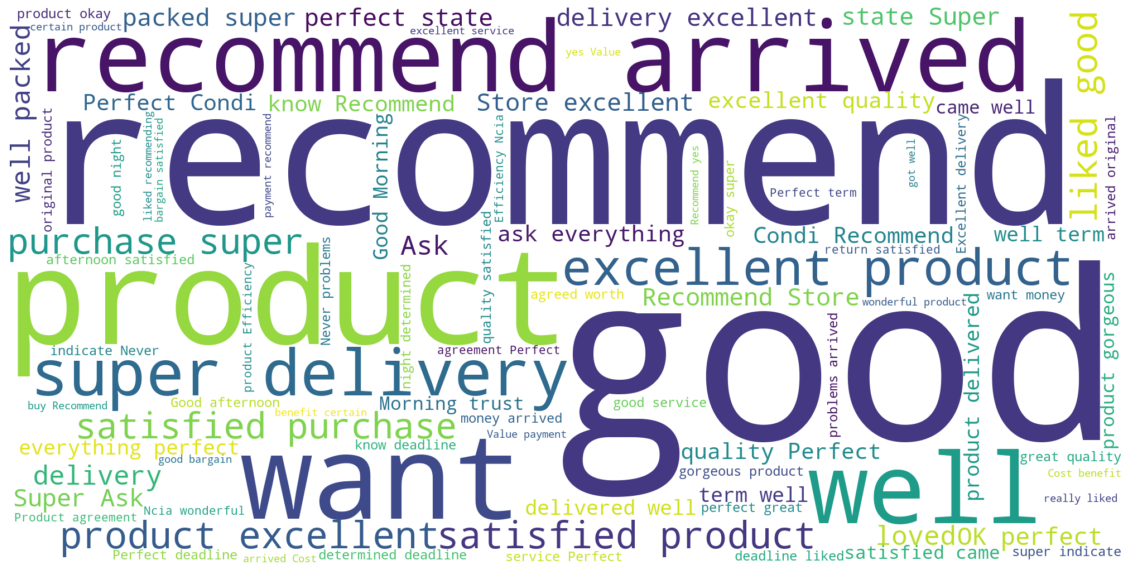

In [30]:
bigram_Spos = (" ").join(bigram_pos['translated_bigram'].tolist())

wordcloud_pos = WordCloud(width=2000, height =1000,collocation_threshold = 2, 
                       background_color = 'white').generate(bigram_Spos)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud_pos,interpolation="bilinear")
plt.axis('off')
plt.show()

### Conclusion

#### Areas of Improvement for Sellers:
- delivery time
- delivery to correct person
- quality of products
- product defects and missing parts


#### Customers can Mostly Expect
- product to be delivered within time
- mostly good products recommended by previous buyers

### Translate using Google Sheets
(Too many requests for  `google_trans_new` )
- Translate using function `GOOGLETRANSLATE`

In [26]:
translated_review =pd.read_csv('./data/olist_translated_reviews_dataset.csv')
com_rate2 = pd.DataFrame(translated_review[['order_id', 'review_score', 'review_comment_message', 'review_translated_message']])
com_rate2 = com_rate2.dropna()
#com_rate2['polarity_score'] = np.nan

com_rate2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41726 entries, 3 to 99999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   order_id                   41726 non-null  object
 1   review_score               41726 non-null  int64 
 2   review_comment_message     41726 non-null  object
 3   review_translated_message  41726 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [27]:
polarity_full = []
for i in com_rate2['review_translated_message']:
    polar = sia.polarity_scores(i).get('compound')
    polarity_full += [polar]
    

com_rate2['polarity_score'] = np.array(polarity_full)
com_rate2

,order_id,review_score,review_comment_message,review_translated_message,polarity_score
3,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,I received well before the deadline.,0.2732
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,Congratulations lannister loved stores buy the...,0.9601
9,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,efficient device. site in the set to this prin...,0.4215
12,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\n","But rather, waging ... the value ta Good.\n",0.6486
15,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...","trusted seller, product ok and delivery before...",0.6486
...,...,...,...,...,...
99983,509b86c65fe4e2ad5b96408cfef9755e,5,Entregou dentro do prazo. O produto chegou em ...,Delivered on time. The product arrived in perf...,0.7955
99990,d5cb12269711bd1eaf7eed8fd32a7c95,3,"O produto não foi enviado com NF, não existe v...","The product was not shipped with NF, there is ...",-0.4874
99996,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...","Great bag, super fast delivery. Super recommen...",0.9402
99998,f8bd3f2000c28c5342fedeb5e50f2e75,1,Solicitei a compra de uma capa de retrovisor c...,I requested to purchase a Celtic rear cover / ...,-0.6941


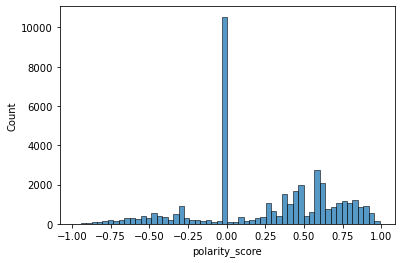

In [28]:
sb.histplot(data = com_rate2, x = 'polarity_score')
plt.show()

Most comments are neutral, followed by positive comments and then negative comments.